# Day 01: Exploring data with `pandas` - solution

*This is only one of the possible solutions. There are many ways to answer these questions.*

<img src="https://miro.medium.com/max/819/1*Dss7A8Z-M4x8LD9ccgw7pQ.png" width="500px">

## Learning goals

Today, we will make sure that everyone learns how they can use `pandas`, `matplotlib`, and `seaborn`.

After working through these ideas, you should be able to:
1. know where to find the documentation for `pandas`, `matplotlib`, and `seaborn`
2. load a dataset with `pandas` and explore it
3. visualize a dataset with `matplotlib` and `seaborn`
4. do some basic data analysis

## Notebook instructions

We will work through the notebook making sure to write all necessary code and answer any questions. We will start together with the most commonly performed tasks. Then you will work on the analyses, posed as research questions, in groups.

## Outline:

1. [Stellar Classification Dataset - SDSS17](#dataset)
2. [Loading and exploring a dataset](#loading)
3. [Visualizing your data](#visualizing)
4. [Data analysis](#analysis)

### Useful imports (make sure to execute this cell!)
Let's get a few of our imports out of the way. If you find others you need to add, consider coming back and putting them here.

In [2]:
# necessary imports for this notebook
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks') # setting style
sns.set_context('talk') # setting context
sns.set_palette('colorblind') # setting palette

### Libraries

We will be using the following libraries to get started:

* `numpy` for numerical operations. 
> The `numpy` library is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays. You can find the documentation [here](https://numpy.org/doc/stable/).
* `pandas` for data manipulation. 
> The `pandas` library is a powerful tool for data analysis and manipulation in Python. It provides data structures like DataFrames and Series, which make it easy to work with structured data. It is quickly becoming the standard for data analysis in Python. You can find the documentation [here](https://pandas.pydata.org/docs/).
* `matplotlib` for data visualization. 
> The `matplotlib` library is a widely used library for creating static, animated, and interactive visualizations in Python. It provides a flexible framework for creating a wide range of plots and charts. You can find the documentation [here](https://matplotlib.org/stable/contents.html).
* `seaborn` for statistical data visualization. 
> The `seaborn` library is built on top of `matplotlib` and provides a high-level interface for drawing attractive and informative statistical graphics. It simplifies the process of creating complex visualizations. You can find the documentation [here](https://seaborn.pydata.org/).

**NOTE**: You should read through documentation for these libraries as you go along. The documentation is a great resource for learning how to use these libraries effectively. And the documentation is written the same way for almost all Python libraries, so it is a good skill to develop as you learn to use Python for science.

----
<a id="dataset"></a>
## 1. Stellar Classification Dataset - SDSS17

The [Stellar Classification Dataset](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17) is a collection of observations of stars from the Sloan Digital Sky Survey (SDSS). The dataset contains various features of stars, such as their brightness, color, and spectral type, which can be used to classify them into different categories. The data set has 100,000 observations of starts, with 17 features and 1 class column. The features include:

| Feature        | Description |
|----------------|-------------|
| obj_ID         | Object Identifier, the unique value that identifies the object in the image catalog used by the CAS |
| alpha          | Right Ascension angle (at J2000 epoch) |
| delta          | Declination angle (at J2000 epoch) |
| u              | Ultraviolet filter in the photometric system |
| g              | Green filter in the photometric system |
| r              | Red filter in the photometric system |
| i              | Near Infrared filter in the photometric system |
| z              | Infrared filter in the photometric system |
| run_ID         | Run Number used to identify the specific scan |
| rereun_ID      | Rerun Number to specify how the image was processed |
| cam_col        | Camera column to identify the scanline within the run |
| field_ID       | Field number to identify each field |
| spec_obj_ID    | Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class) |
| redshift       | Redshift value based on the increase in wavelength |
| plate          | Plate ID, identifies each plate in SDSS |
| MJD            | Modified Julian Date, used to indicate when a given piece of SDSS data was taken |
| fiber_ID       | Fiber ID that identifies the fiber that pointed the light at the focal plane in each observation |

And the class column is:

| Feature        | Description |
|----------------|-------------|
| class | object class (galaxy, star or quasar object) |

Some of the features are values representing the brightness of the star in different filters, while others are positional coordinates in the sky. The class column indicates whether the object is a galaxy, star, or quasar. 


For this exercise, we will use the Stellar Classification Dataset to explore how to load and visualize data using `pandas`, `matplotlib`, and `seaborn`. Later we will use this dataset for some classification and regression tasks.

---
<a id="loading"></a>
## 2. Loading and exploring a dataset

The goal is typically to read some sort of preexisting data **into** a DataFrame so we can work with it. 

Pandas is pretty flexible about reading in data and can read in a [variety of formats](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html). However, it sometimes needs a little help. We are going to read in a CSV file, which is a common format for data. 

The Stellar Classification dataset is one that has a particularly nice set of features and is of a manageable size such that it can be used as a good dataset for learning new data analysis techiques or testing out code. This allows one to focus on the code and data science methods without getting too caught up in wrangling the data. However, **data wrangling** is an authentic part of doing any sort of meaningful data analysis as data more often messier than not. 

Although you will be working with this dataset today, you may still have to do a bit of wrangling along the way.

### 2.1 Reading in the data

Download the data set from [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17) and save it in the same directory as this notebook, or you can use the following code to load it if you cloned the repository.

**NOTE:** We need to check this data for missing values or other issues before we can use it.

### ✅ Tasks: 

* Using `read_csv()` to load the data
* Using `head()` to look at the first few rows

**Note:** For this data set, `read_csv()` will automatically detect the delimiter as a comma, so we don't need to specify it. If you were reading in a file with a different delimiter, you would need to specify it using the `sep` parameter. Moreover, if the data had headers that were not the first row, you would need to specify the `header` parameter. 

In [3]:
### your code here

stellar = pd.read_csv('./data/star_classification.csv')
stellar.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

### 2.2 Checking the data

One of the first things we want to do is check the data for missing values or other issues. The `pandas` library provides several methods to help us with this. We will start by using `info()`, which provides a concise summary of the DataFrame, including the number of non-null values in each column and the data types.

This is a good first step to understand the structure of the data and identify any potential issues, such as missing values or incorrect data types. Moreover, it will tell you how your data was imported, and if there are any columns that were not imported correctly.

### ✅ Tasks: 

* Using `info()` to check the data types and missing values

**What do you notice about the data? Are there any issue with the import?**

In [4]:
### your code here

stellar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

Next, we will use `describe()` to get a summary of the data. This will give us some basic statistics about the numerical columns in the DataFrame, such as the mean, standard deviation, minimum, and maximum values. This is useful for understanding the distribution of the data and identifying any potential outliers.

Researchers sometimes use aberrant values to identify potential issues with the data, such as errors in data entry or measurement. Sometimes, these values are read in as `NaN` (not a number) or `inf` (infinity), which can cause issues with analysis. But, other times, the researcher might force a particular value to be a certain number, such as 0 or 99, to indicate that the value is missing or not applicable.

### ✅ Tasks: 
* Using `describe()` to get a summary of the data

**What do you notice about the data? Are there any issue with starting the analysis?**

In [5]:
### your code here

stellar.describe()

obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      17.732285      17.460677   
50%        21.099835      20.125290      19.405145      19.004595   
75%        22.123767      21.044785      20.396495      19.921120   
max        31.602240      29.571860      32.141470      29.383740   

              run_ID  rerun_ID        cam_col       field_ID   spec_obj_ID  \
count  100000.000000  100000.0  100000.000000  100000.000000  1.000000e+05   
mean     4481.366060     301.0       3.511610     186.130520  5.783882e+18   
std      1964.764593       0.0       1.586912     149.011073  3.324016e+18   
min       109.000000     301.0       1.000000      11.000000  2.995191e+17   
25%      3187.000000     301.0       2.000000      82.000000  2.844138e+18   
50%      4188.000000     301.0       4.000000     146.000000  5.614883e+18   
75%      5326.000000     301.0       5.000000     241.000000  8.332144e+18   
max      8162.000000     301.0       6.000000     989.000000  1.412694e+19   

            redshift          plate            MJD       fiber_ID  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.576661    5137.009660   55588.647500     449.312740  
std         0.730707    2952.303351    1808.484233     272.498404  
min        -0.009971     266.000000   51608.000000       1.000000  
25%         0.054517    2526.000000   54234.000000     221.000000  
50%         0.424173    4987.000000   55868.500000     433.000000  
75%         0.704154    7400.250000   56777.000000     645.000000  
max         7.011245   12547.000000   58932.000000    1000.000000

### 2.3 Slicing the data

You likely noticed there were some problematic values in the data; some of the photometric values are negative, which is not possible. We will need to remove these rows from the DataFrame before we can do any analysis. However, we can also use this as an opportunity to practice slicing the DataFrame. So we will also reduce the DataFrame to only the columns we are interested in.

Slicing a DataFrame is a common operation in `pandas` and allows you to select specific rows and columns based on certain conditions. You can use boolean indexing to filter the DataFrame based on conditions, such as selecting rows where a certain column is greater than a certain value. Here's some common examples of slicing a DataFrame:

```python
# Select all rows where the 'u' column is greater than 0
df_u_positive = df[df['u'] > 0]
# Select specific columns
df_selected_columns = df[['obj_ID', 'class', 'u', 'g', 'r', 'i', 'z']]
# Select rows where the 'class' column is 'star'
df_stars = df[df['class'] == 'star']
```

### ✅ Tasks:

* Reduce the DataFrame to only the columns we are interested in (`obj_ID`, `class`, `u`, `g`, `r`, `i`, `z`, and `redshift`) -  that is the object ID, class, and the photometric values in the different filters, as well as the redshift value.
* Remove rows where any of the photometric values are negative (i.e., `u`, `g`, `r`, `i`, `z`).
* Store the result in a new DataFrame called `df_stellar`.
* Use `describe()` to check the new DataFrame.

In [6]:
### your code here

# remove all the columns that are not needed
df_stellar = stellar[['obj_ID', 'class', 'u', 'g', 'r', 'i', 'z','redshift']]

# drop any row with negative photometric values
filter = (df_stellar['u'] >= 0) & (df_stellar['g'] >= 0) & (df_stellar['r'] >= 0) & (df_stellar['i'] >= 0) & (df_stellar['z'] >= 0)
df_stellar = df_stellar[filter]

# describe the data again
df_stellar.describe()

obj_ID             u             g             r             i  \
count  9.999900e+04  99999.000000  99999.000000  99999.000000  99999.000000   
mean   1.237665e+18     22.080679     20.631583     19.645777     19.084865   
std    8.438450e+12      2.251068      2.037384      1.854763      1.757900   
min    1.237646e+18     10.996230     10.498200      9.822070      9.469903   
25%    1.237659e+18     20.352410     18.965240     18.135795     17.732280   
50%    1.237663e+18     22.179140     21.099930     20.125310     19.405150   
75%    1.237668e+18     23.687480     22.123775     21.044790     20.396510   
max    1.237681e+18     32.781390     31.602240     29.571860     32.141470   

                  z      redshift  
count  99999.000000  99999.000000  
mean      18.768988      0.576667  
std        1.765982      0.730709  
min        9.612333     -0.009971  
25%       17.460830      0.054522  
50%       19.004600      0.424176  
75%       19.921120      0.704172  
max       29.383740      7.011245

-----
<a id="visualizing"></a>
## 3. Visualizing your data

Now that we have a clean DataFrame, we can start visualizing the data. Visualization is an important part of data analysis, as it allows us to see patterns and relationships in the data that may not be immediately obvious from the raw data. There a many ways to visualize data in `pandas`, but we will focus on two libraries: `matplotlib` and `seaborn`. These are the most commonly used libraries for data visualization in Python, and they provide a wide range of plotting options.

### 3.1 Using `matplotlib`
`matplotlib` is a powerful library for creating static, animated, and interactive visualizations in Python. It provides a flexible framework for creating a wide range of plots and charts. The most common way to use `matplotlib` is to create a figure and then add one or more axes to the figure. You can then plot data on the axes using various plotting functions. 

Here's a simple example of how to create a scatter plot using `matplotlib` for a DataFrame `df` with columns `x` and `y`:

```python
import matplotlib.pyplot as plt
# Create a figure and axes
fig, ax = plt.subplots()
# Plot data on the axes
ax.plot(df['x'], df['y'], 'o')
# Set the x and y axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
# Set the title of the plot
ax.set_title('x vs y')
# Show the plot
plt.show()
```

### ✅ Tasks:
* Create a scatter plot of `u` vs `g` using `matplotlib`.
* Label the x and y axes and give the plot a title.

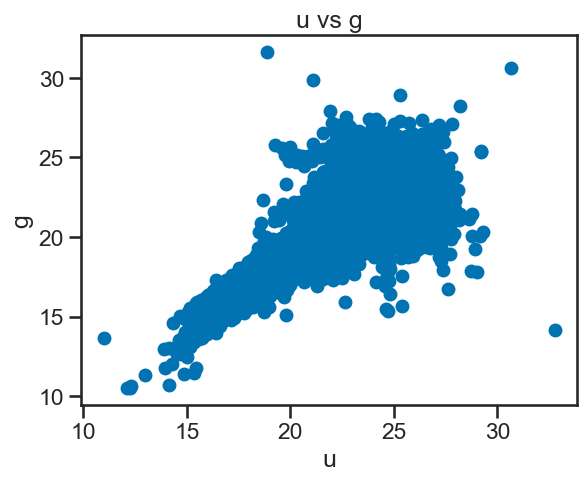

In [7]:
### your code here

# Create a figure and axes
fig, ax = plt.subplots()
# Plot data on the axes
ax.plot(df_stellar['u'], df_stellar['g'], 'o')
# Set the x and y axis labels
ax.set_xlabel('u')
ax.set_ylabel('g')
# Set the title of the plot
ax.set_title('u vs g')
# Show the plot
plt.show()

Now that you have the hang of it, let's try a few more plots.

### ✅ Tasks:
* Create a series of scatter plots of `u` vs `g`, `u` vs `r`, `u` vs `i`, and `u` vs `z` in a single figure using `matplotlib`.

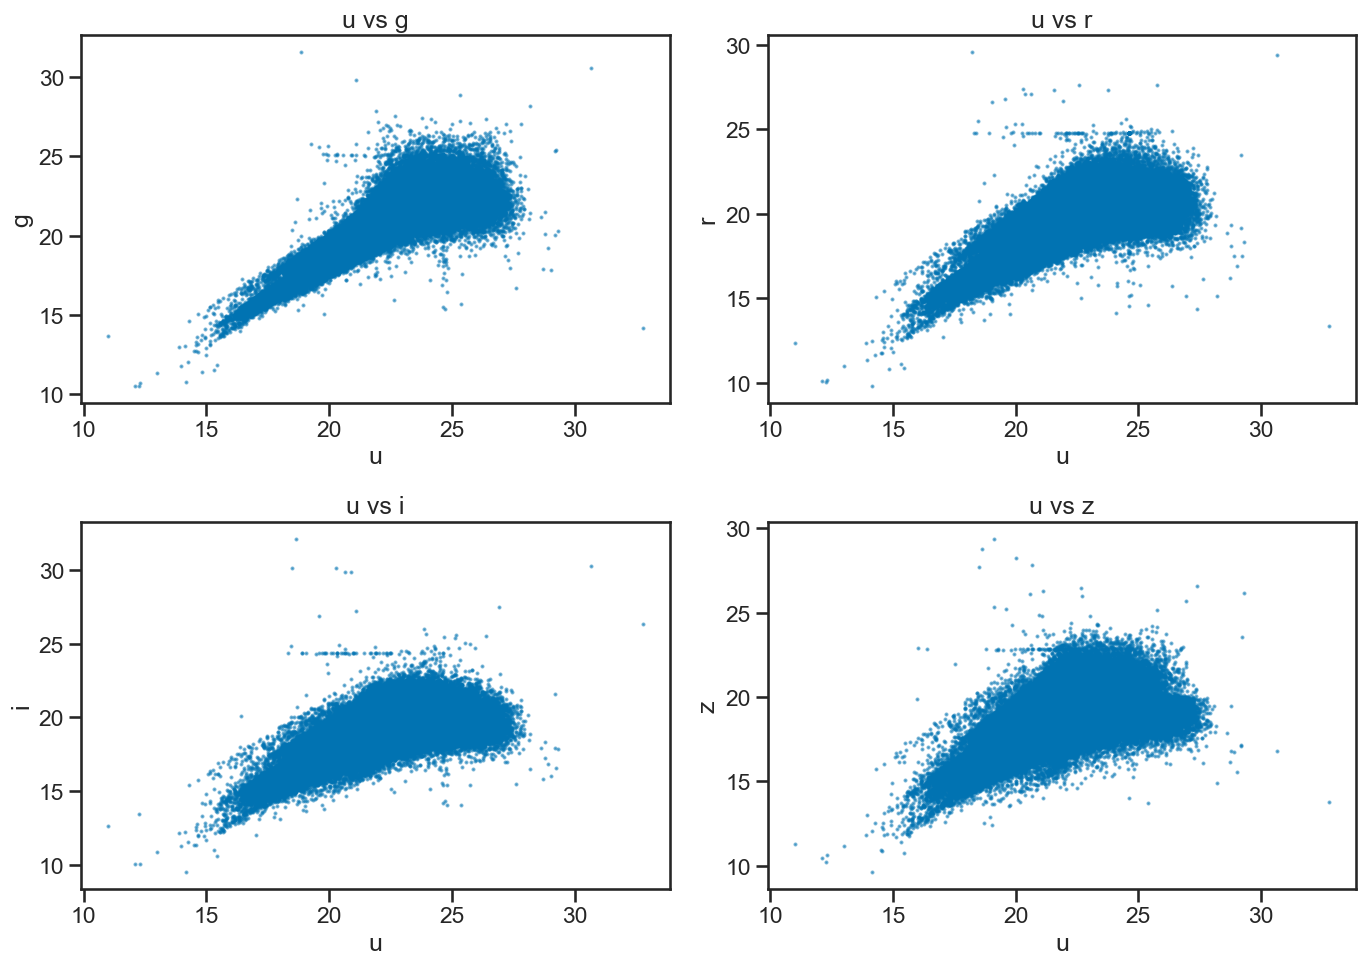

In [8]:
### your code here

# Create a 2x2 grid of scatter plots for u vs g, r, i, z
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# u vs g
axes[0, 0].scatter(df_stellar['u'], df_stellar['g'], s=2, alpha=0.5)
axes[0, 0].set_xlabel('u')
axes[0, 0].set_ylabel('g')
axes[0, 0].set_title('u vs g')

# u vs r
axes[0, 1].scatter(df_stellar['u'], df_stellar['r'], s=2, alpha=0.5)
axes[0, 1].set_xlabel('u')
axes[0, 1].set_ylabel('r')
axes[0, 1].set_title('u vs r')

# u vs i
axes[1, 0].scatter(df_stellar['u'], df_stellar['i'], s=2, alpha=0.5)
axes[1, 0].set_xlabel('u')
axes[1, 0].set_ylabel('i')
axes[1, 0].set_title('u vs i')

# u vs z
axes[1, 1].scatter(df_stellar['u'], df_stellar['z'], s=2, alpha=0.5)
axes[1, 1].set_xlabel('u')
axes[1, 1].set_ylabel('z')
axes[1, 1].set_title('u vs z')

plt.tight_layout()
plt.show()

Ok, this is great, but we should notice that there's three classes of objects in the data: `galaxy`, `star`, and `quasar`. We can use this information to color the points in the scatter plot based on their class. You can do this by using the `c` parameter in the `plot()` function to specify the color of the points based on the class column. 

For example, if you have a dataframe `df` with a column `class`, and variables `x` and `y`, you can create a scatter plot with points colored by class like this:

```python
import matplotlib.pyplot as plt
# Create a figure and axes
fig, ax = plt.subplots()
# Plot data on the axes, coloring by class
ax.scatter(df['x'], df['y'], c=df['class'].astype('category').cat.codes, cmap='viridis')
# Set the x and y axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
# Set the title of the plot
ax.set_title('x vs y colored by class')
# Show the plot
plt.show()
```

### ✅ Tasks:
* Create a scatter plot of `u` vs `g` colored by class using `matplotlib`.
* Create a series of scatter plots of `u` vs `g`, `u` vs `r`, `u` vs `i`, and `u` vs `z` in a single figure using `matplotlib`, colored by class.

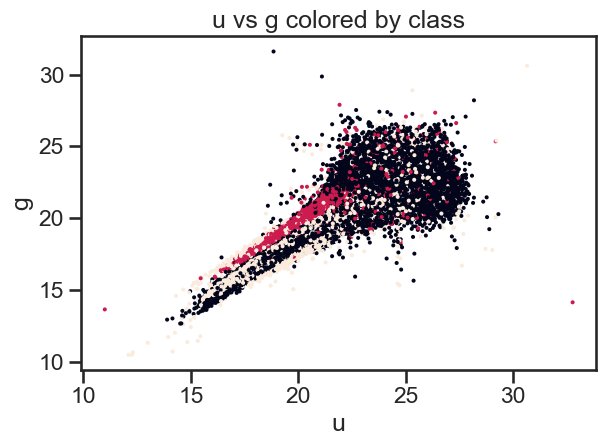

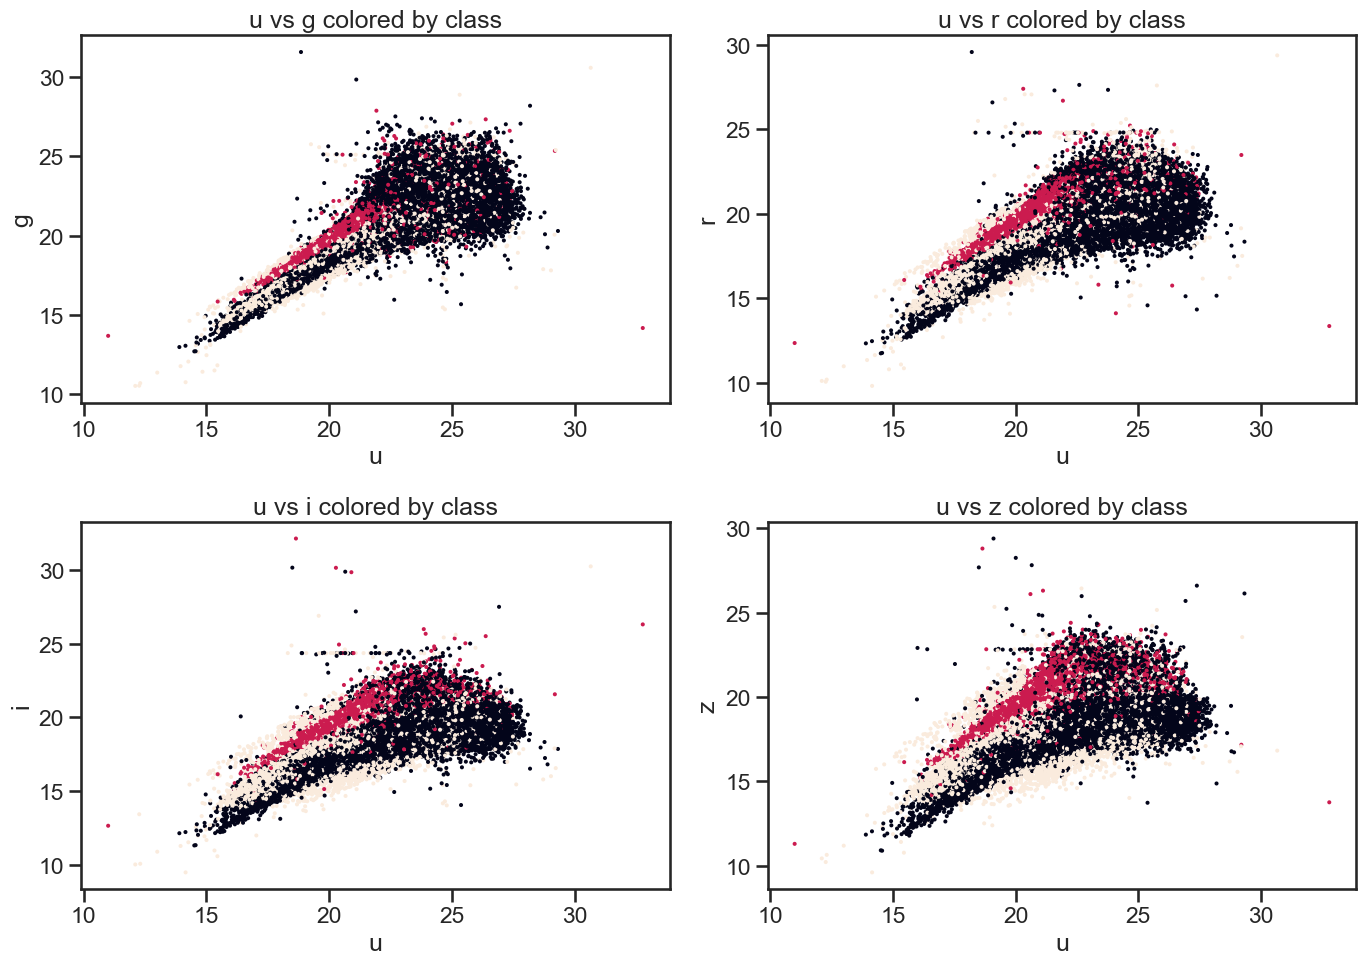

In [9]:
### your code here

# Plot u vs g colored by class of object using matplotlib
fig, ax = plt.subplots()

ax.scatter(df_stellar['u'], df_stellar['g'], c=df_stellar['class'].astype('category').cat.codes, s=2)

ax.set_xlabel('u')
ax.set_ylabel('g')
ax.set_title('u vs g colored by class')
plt.tight_layout()
plt.show()

# Plot u vs all other bands colored by class of object using matplotlib
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# u vs g
axes[0, 0].scatter(df_stellar['u'], df_stellar['g'], c=df_stellar['class'].astype('category').cat.codes, s=2)
axes[0, 0].set_xlabel('u')
axes[0, 0].set_ylabel('g')
axes[0, 0].set_title('u vs g colored by class')

# u vs r
axes[0, 1].scatter(df_stellar['u'], df_stellar['r'], c=df_stellar['class'].astype('category').cat.codes, s=2)
axes[0, 1].set_xlabel('u')
axes[0, 1].set_ylabel('r')
axes[0, 1].set_title('u vs r colored by class')

# u vs i
axes[1, 0].scatter(df_stellar['u'], df_stellar['i'], c=df_stellar['class'].astype('category').cat.codes, s=2)
axes[1, 0].set_xlabel('u')
axes[1, 0].set_ylabel('i')
axes[1, 0].set_title('u vs i colored by class')

# u vs z
axes[1, 1].scatter(df_stellar['u'], df_stellar['z'], c=df_stellar['class'].astype('category').cat.codes, s=2)
axes[1, 1].set_xlabel('u')
axes[1, 1].set_ylabel('z')
axes[1, 1].set_title('u vs z colored by class')

plt.tight_layout()
plt.show()

### 3.2 Using `seaborn`

These plots are great, but they are not as visually appealing as we would like. Also, we would additional information about the plots to make them more informative. This is where `seaborn` comes in. `seaborn` is built on top of `matplotlib` and provides a high-level interface for drawing attractive and informative statistical graphics. It simplifies the process of creating complex visualizations.

For example, let's create a scatter plot of `u` vs `g` using `seaborn` and color the points by class. For a data frame `df` with columns `x`, `y`, and `class`, you can create a scatter plot like this:

```python
import seaborn as sns
# Create a scatter plot of x vs y colored by class
sns.scatterplot(data=df, x='x', y='y', hue='class')
# Set the title of the plot
plt.title('x vs y colored by class')
# Show the plot
plt.show()
```

See how easy that was? `seaborn` takes care of the details for us, such as adding a legend and setting the colors based on the class column.

### ✅ Tasks:
* Create a scatter plot of `u` vs `g` colored by class using `seaborn`.
* Create a series of scatter plots of `u` vs `g`, `u` vs `r`, `u` vs `i`, and `u` vs `z` in a single figure using `seaborn`, colored by class.

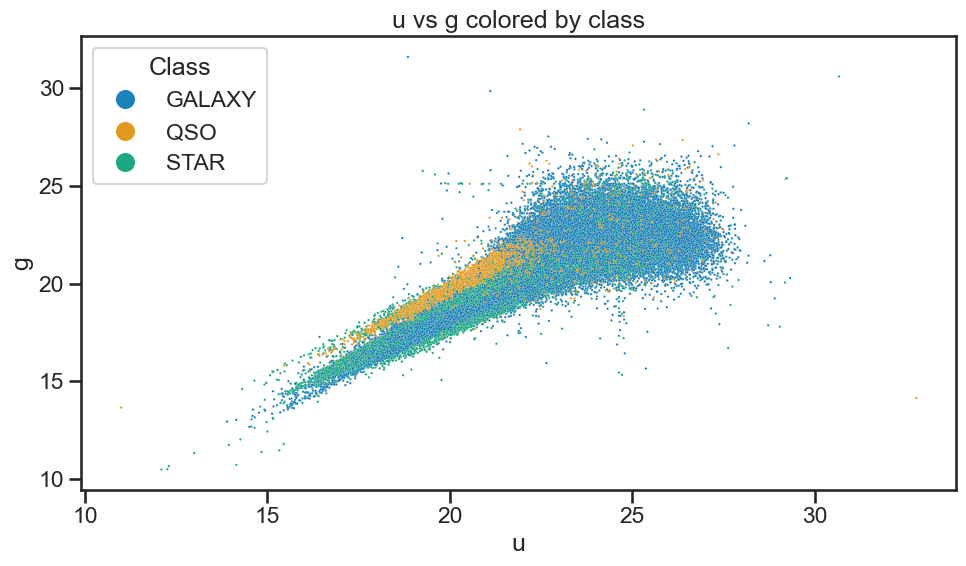

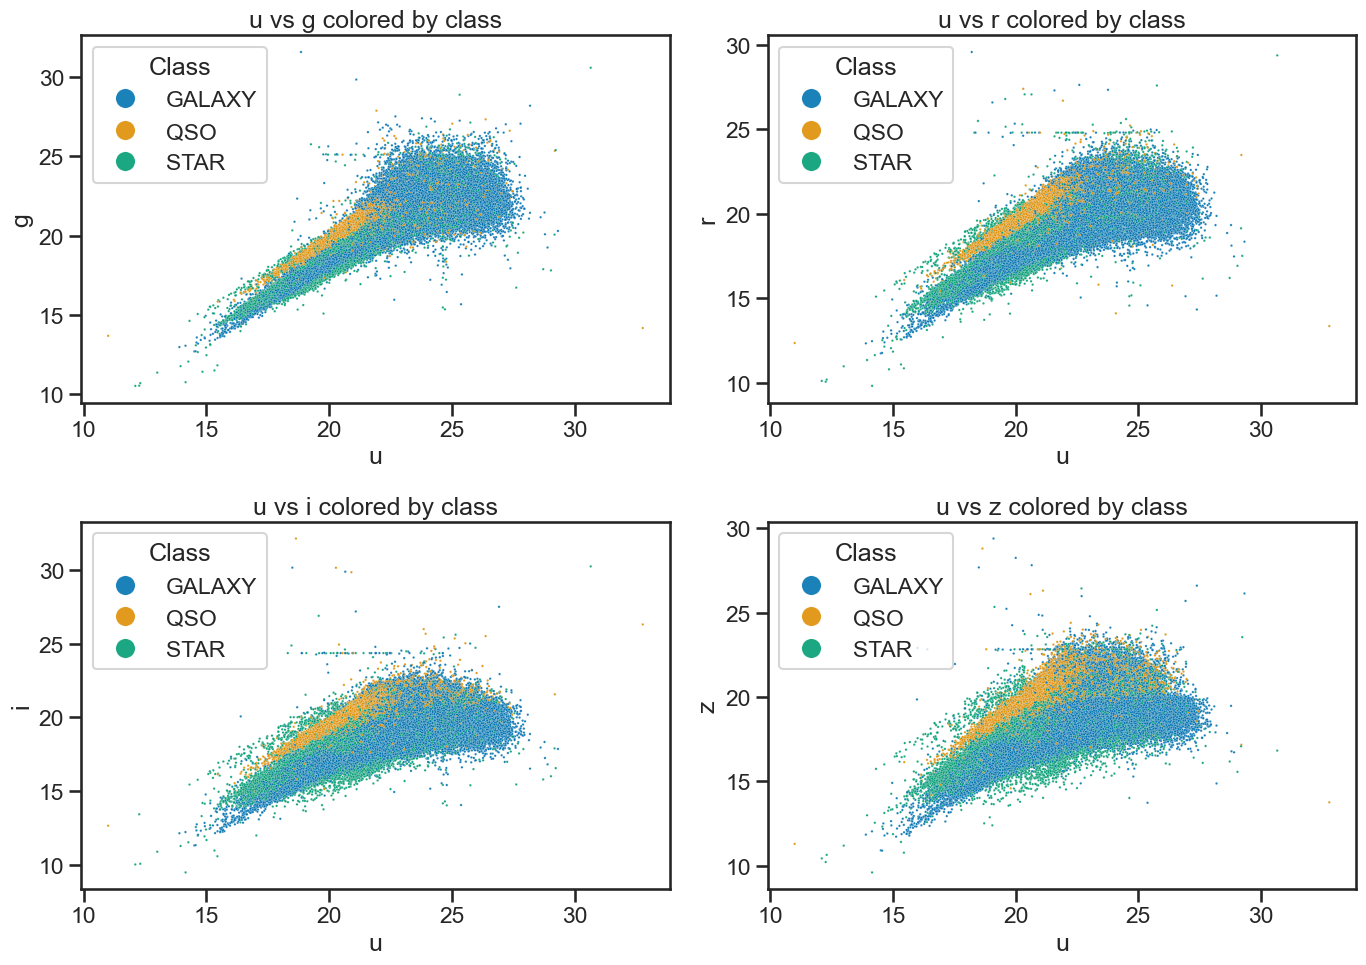

In [10]:
### your code here

# Plot u vs g colored by class of object using seaborn
plt.figure(figsize=(10, 6))

sns.scatterplot(x='u', y='g', hue='class', data=df_stellar, alpha=0.9, s=3)

plt.xlabel('u')
plt.ylabel('g')

plt.title('u vs g colored by class')

plt.legend(title='Class', loc='upper left', markerscale=8)

plt.tight_layout()
plt.show()

# Plot u vs all other bands colored by class of object using seaborn built-in function

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# u vs g
sns.scatterplot(x='u', y='g', hue='class', data=df_stellar, ax=axes[0, 0], alpha=0.9, s=3)
axes[0, 0].set_xlabel('u')
axes[0, 0].set_ylabel('g')
axes[0, 0].set_title('u vs g colored by class')
axes[0, 0].legend(title='Class', loc='upper left', markerscale=8)

# u vs r
sns.scatterplot(x='u', y='r', hue='class', data=df_stellar, ax=axes[0, 1], alpha=0.9, s=3)
axes[0, 1].set_xlabel('u')
axes[0, 1].set_ylabel('r')
axes[0, 1].set_title('u vs r colored by class')
axes[0, 1].legend(title='Class', loc='upper left', markerscale=8)

# u vs i
sns.scatterplot(x='u', y='i', hue='class', data=df_stellar, ax=axes[1, 0], alpha=0.9, s=3)
axes[1, 0].set_xlabel('u')
axes[1, 0].set_ylabel('i')
axes[1, 0].set_title('u vs i colored by class')
axes[1, 0].legend(title='Class', loc='upper left', markerscale=8)

# u vs z
sns.scatterplot(x='u', y='z', hue='class', data=df_stellar, ax=axes[1, 1], alpha=0.9, s=3)
axes[1, 1].set_xlabel('u')
axes[1, 1].set_ylabel('z')
axes[1, 1].set_title('u vs z colored by class')
axes[1, 1].legend(title='Class', loc='upper left', markerscale=8)


plt.tight_layout()
plt.show()

-----
<a id="analysis"></a>
## 4. Data analysis

Great! Now that we've learned to import data, to review it for issues, and to visualize it, we can start to do some data analysis. For these tasks, you will need to investigate how to perform the analysis and present the results. You can use the documentation for `pandas`, `matplotlib`, and `seaborn` to help you with this. 

You are welcome to use any additional libraries that you like.

### Research questions

1. What is the distribution of the photometric values (`u`, `g`, `r`, `i`, `z`) for each class? That is, how do the photometric values vary for each class of object? **Think histograms, box plots, or violin plots.**
2. How do the photometric values (`u`, `g`, `r`, `i`, `z`) linearly correlate with each other for each class? **Think scatter plots; correlation matrices; and lines of best fit.**
3. What is the distribution of redshift values for each class? **Think histograms or box plots.**
4. How do photometric values (`u`, `g`, `r`, `i`, `z`) vary with redshift for each class? **Think scatter plots with lines of best fit.**

### ✅ Tasks:

* Work in groups to answer the research questions.
* Use the documentation for `pandas`, `matplotlib`, and `seaborn` to help you with the analysis.
* Document your analysis in the notebook, including any code you used and the results of your analysis.
* Take your time, there's no rush to complete all the tasks. The goal is to learn how to use the tools and to practice data analysis.

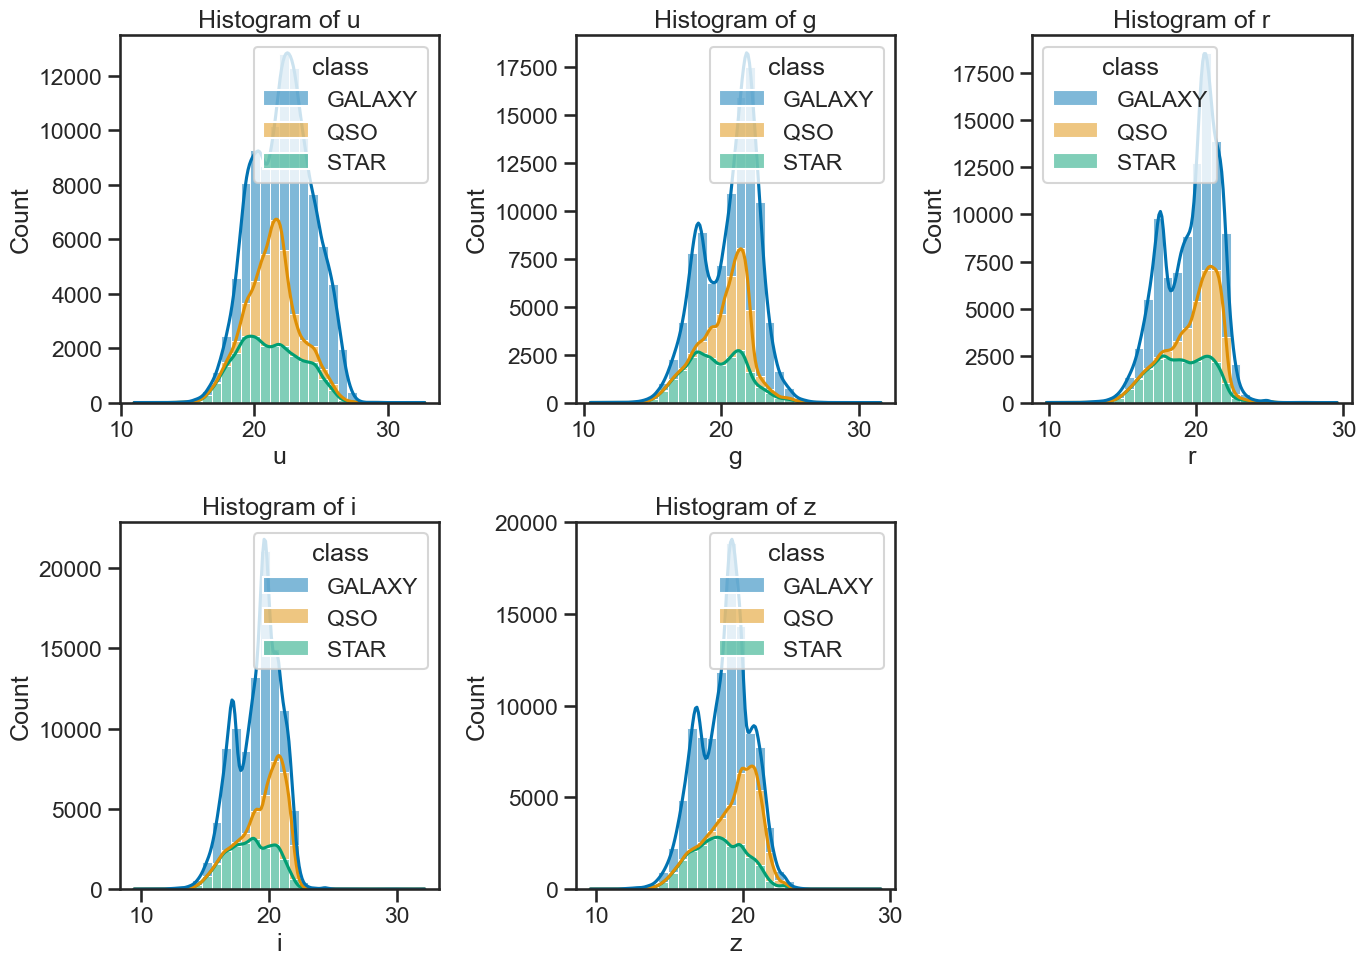

In [11]:
### your code here

# create subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 10))

# use seaborn to plot histograms of u, g, r, i, z
# include the class as hue
# and use kde for density estimation
sns.histplot(data=df_stellar, x='u', hue='class', multiple='stack', ax=axes[0, 0], bins=30, kde=True)
sns.histplot(data=df_stellar, x='g', hue='class', multiple='stack', ax=axes[0, 1], bins=30, kde=True)
sns.histplot(data=df_stellar, x='r', hue='class', multiple='stack', ax=axes[0, 2], bins=30, kde=True)
sns.histplot(data=df_stellar, x='i', hue='class', multiple='stack', ax=axes[1, 0], bins=30, kde=True)
sns.histplot(data=df_stellar, x='z', hue='class', multiple='stack', ax=axes[1, 1], bins=30, kde=True)

axes[1, 2].axis('off')  # Hide the empty subplot

# set titles for each subplot
axes[0, 0].set_title('Histogram of u')
axes[0, 1].set_title('Histogram of g')
axes[0, 2].set_title('Histogram of r')
axes[1, 0].set_title('Histogram of i')
axes[1, 1].set_title('Histogram of z')

plt.tight_layout()
plt.show()

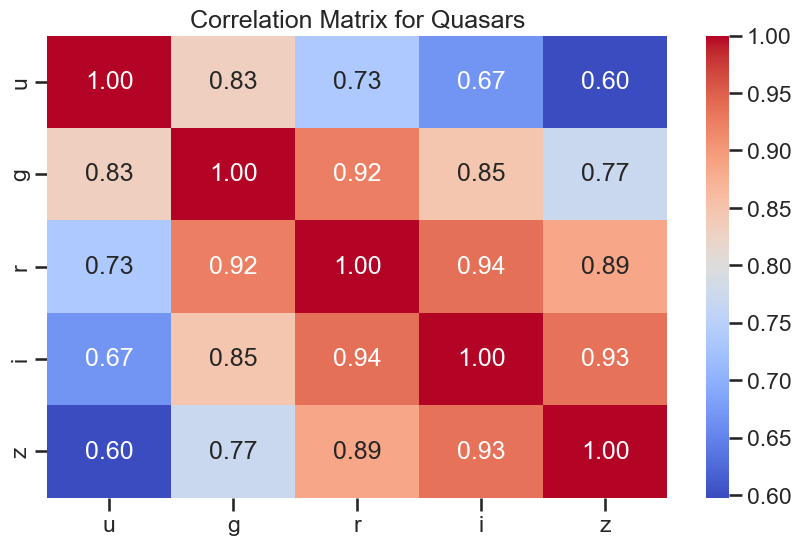

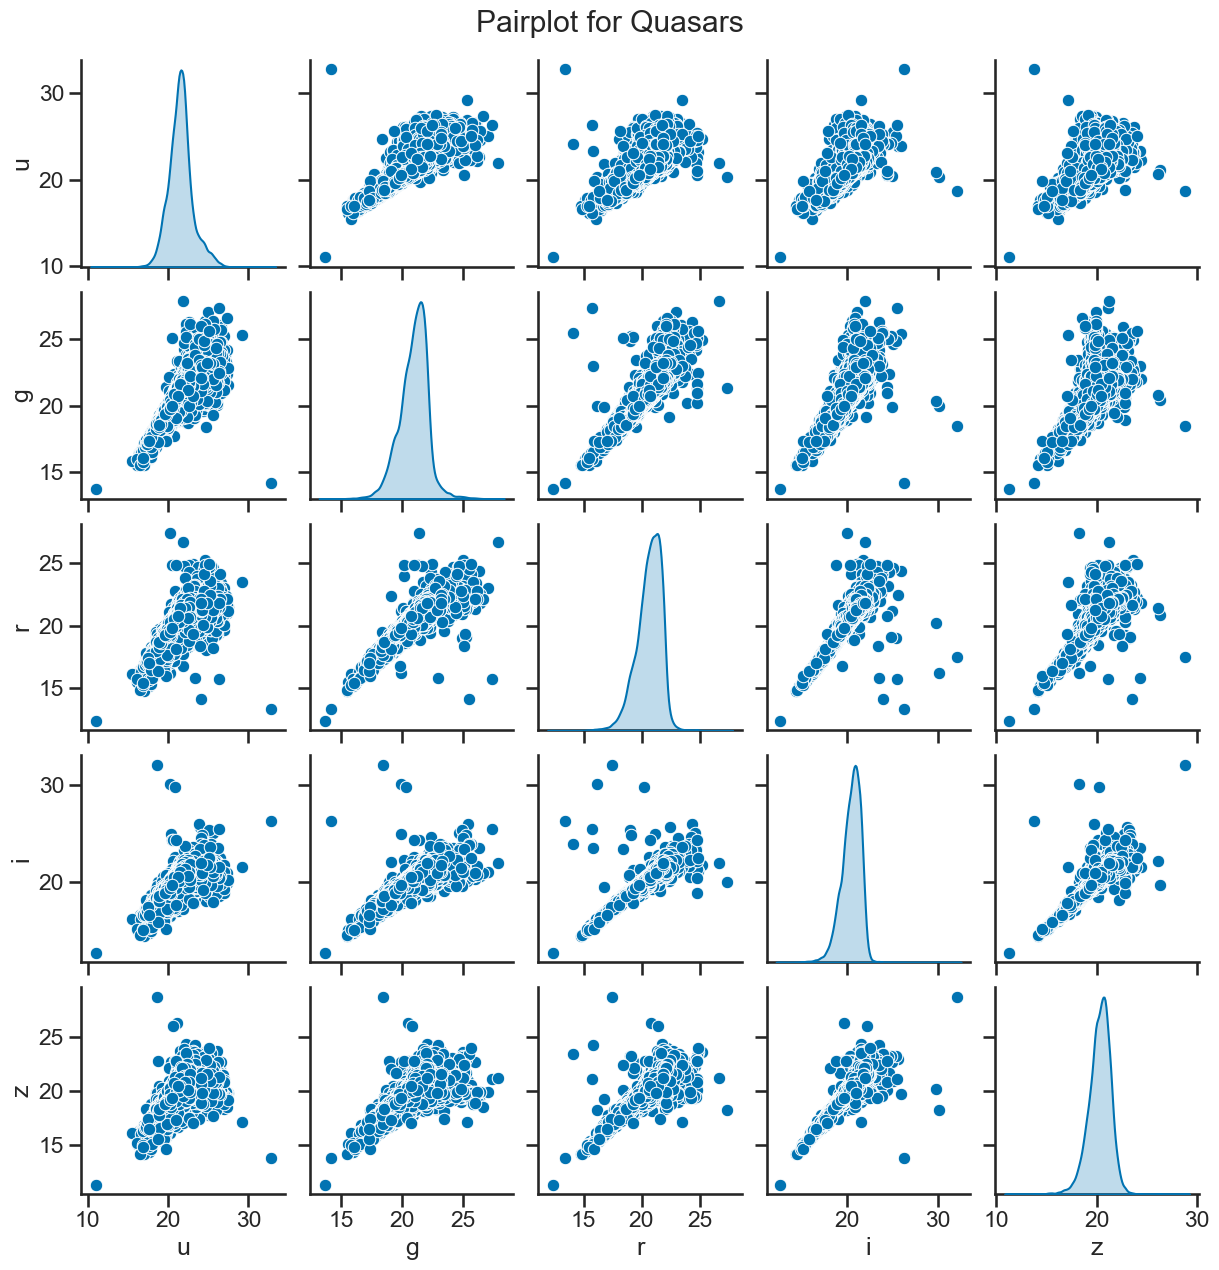

In [12]:
### your code here

### Create separate DataFrames for each class
df_quasar = df_stellar[df_stellar['class'] == 'QSO']
df_galaxy = df_stellar[df_stellar['class'] == 'GALAXY']
df_star = df_stellar[df_stellar['class'] == 'STAR']

# correlation plots for quasars
plt.figure(figsize=(10, 6))
sns.heatmap(df_quasar[['u', 'g', 'r', 'i', 'z']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Quasars')
plt.show()

# matrix of scatter plots for quasars
sns.pairplot(df_quasar[['u', 'g', 'r', 'i', 'z']], diag_kind='kde')
plt.suptitle('Pairplot for Quasars', y=1.02)
plt.show()

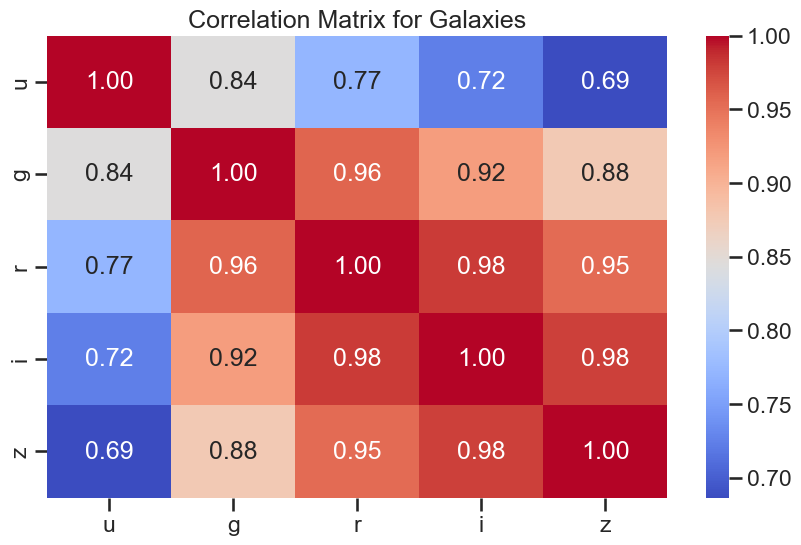

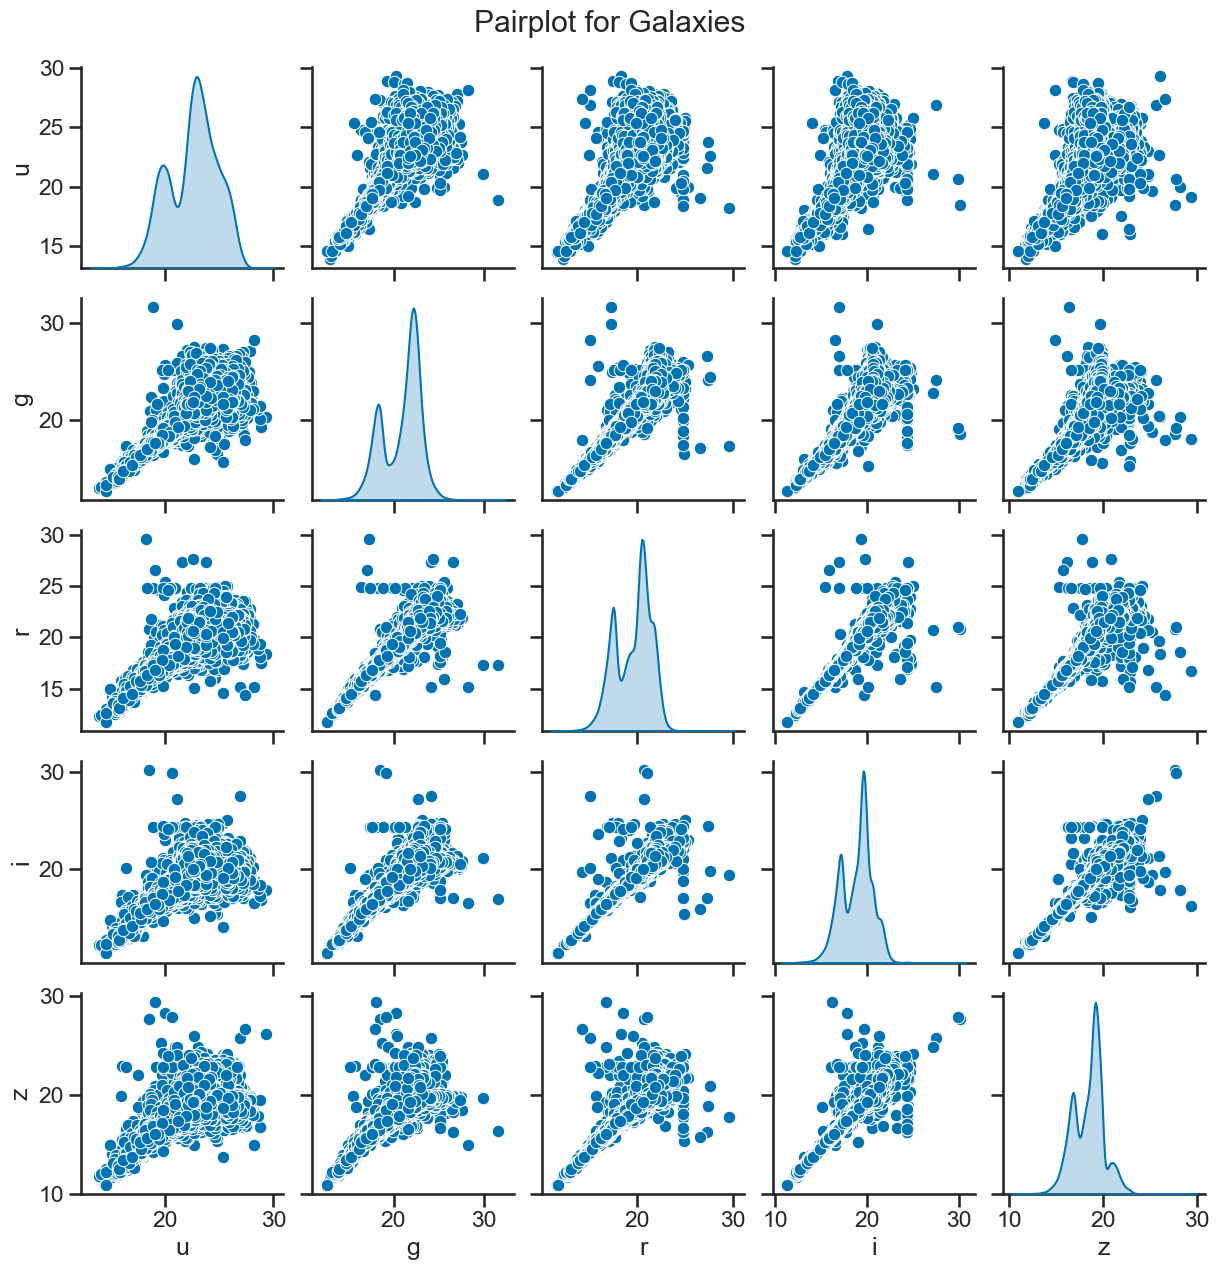

In [13]:
### your code here

# correlation plots for galaxies
plt.figure(figsize=(10, 6))
sns.heatmap(df_galaxy[['u', 'g', 'r', 'i', 'z']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Galaxies')
plt.show()

# matrix of scatter plots for galaxies
sns.pairplot(df_galaxy[['u', 'g', 'r', 'i', 'z']], diag_kind='kde')
plt.suptitle('Pairplot for Galaxies', y=1.02)
plt.show()

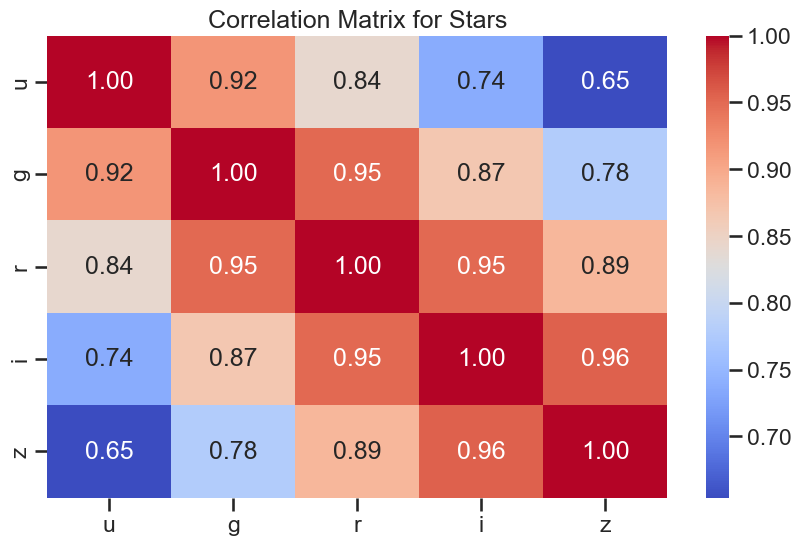

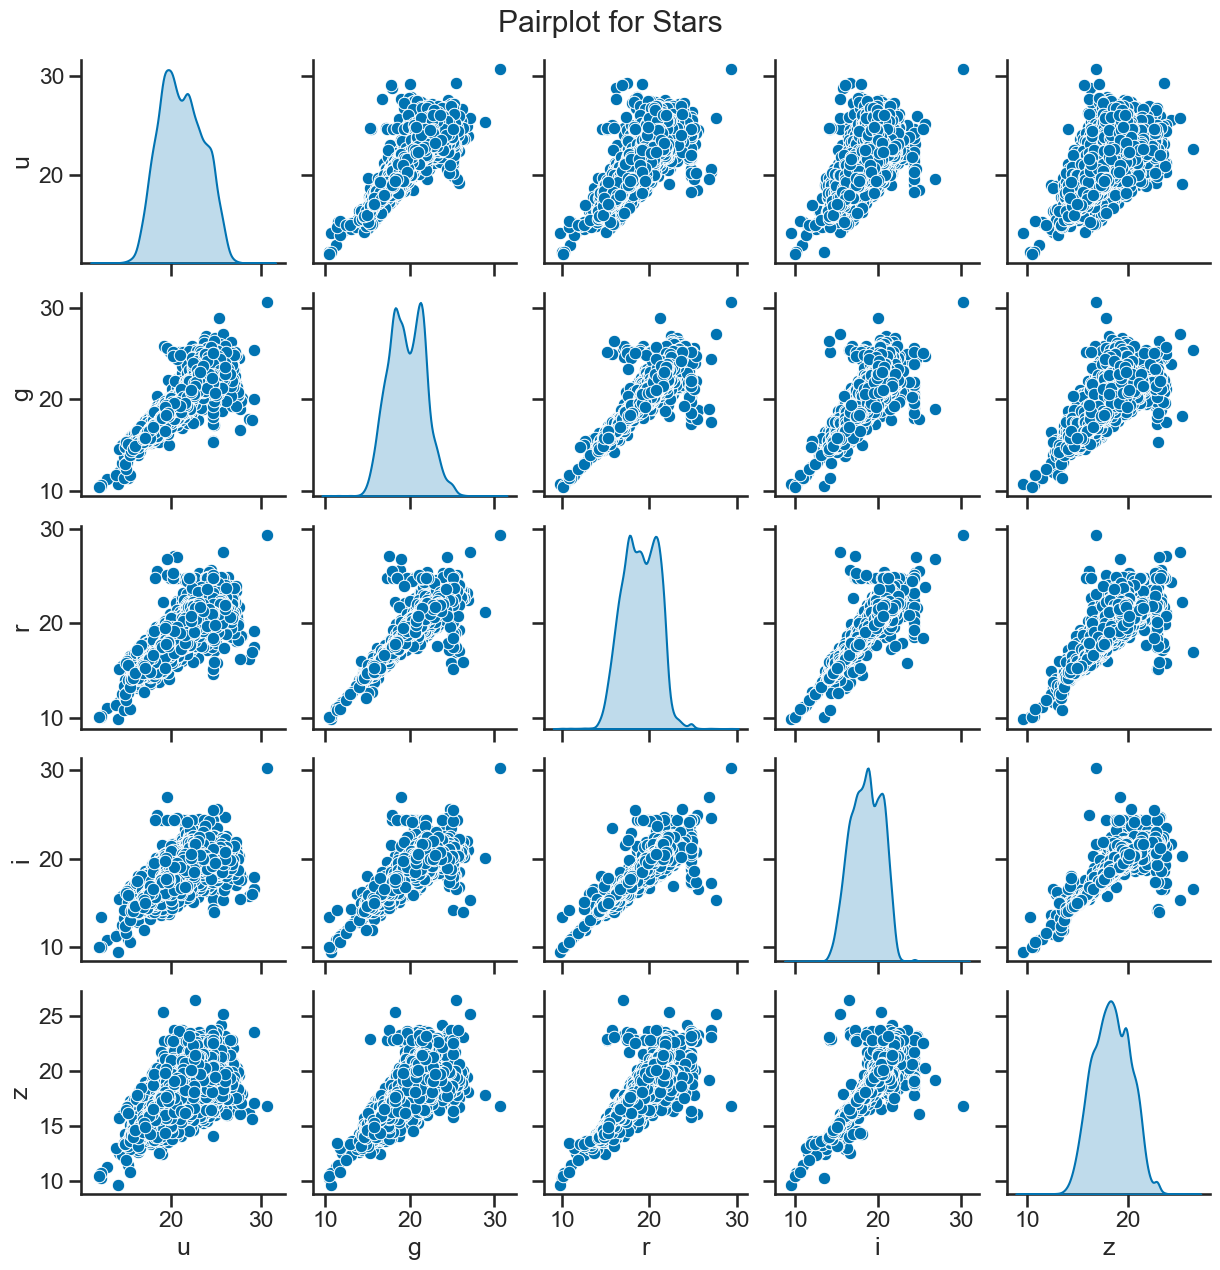

In [14]:
### your code here

# correlation plots for stars
plt.figure(figsize=(10, 6))
sns.heatmap(df_star[['u', 'g', 'r', 'i', 'z']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Stars')
plt.show()

# matrix of scatter plots for stars
sns.pairplot(df_star[['u', 'g', 'r', 'i', 'z']], diag_kind='kde')
plt.suptitle('Pairplot for Stars', y=1.02)
plt.show()

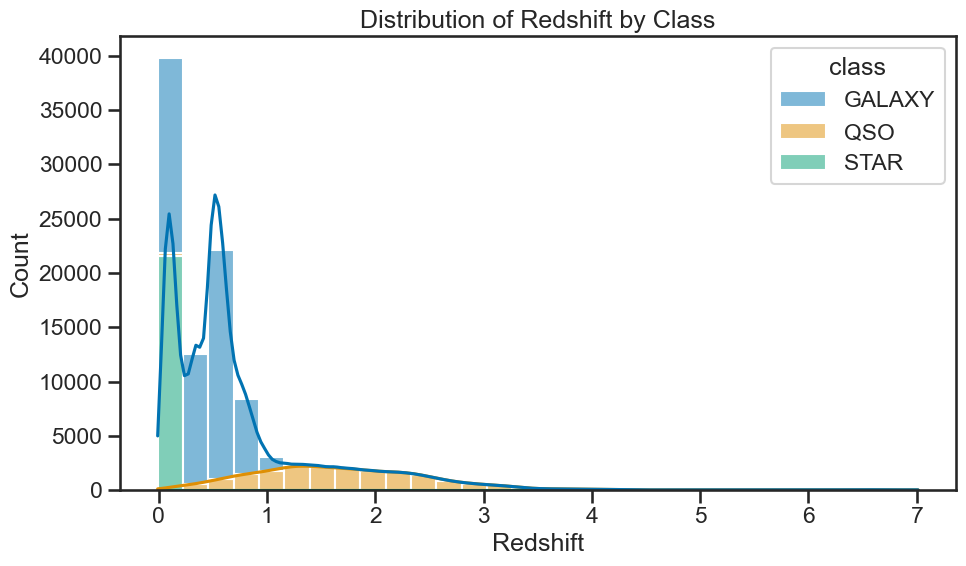

In [15]:
### your code here

# for each class, plot the distribution of redshift
plt.figure(figsize=(10, 6))
sns.histplot(data=df_stellar, x='redshift', hue='class', multiple='stack', bins=30, kde=True)
plt.title('Distribution of Redshift by Class')
plt.xlabel('Redshift')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

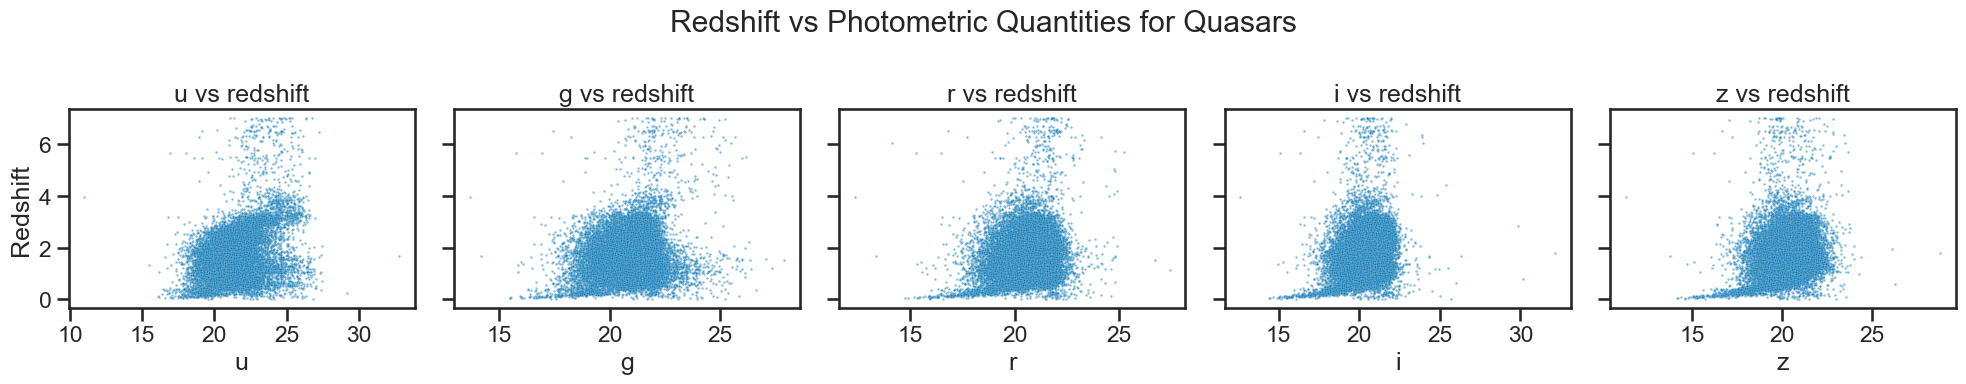

In [16]:
### your code here

# Plotting redshift against photometric quantities for quasars
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

sns.scatterplot(x='u', y='redshift', data=df_quasar, ax=axes[0], alpha=0.5, s=3)
axes[0].set_xlabel('u')
axes[0].set_title('u vs redshift')

sns.scatterplot(x='g', y='redshift', data=df_quasar, ax=axes[1], alpha=0.5, s=3)
axes[1].set_xlabel('g')
axes[1].set_title('g vs redshift')

sns.scatterplot(x='r', y='redshift', data=df_quasar, ax=axes[2], alpha=0.5, s=3)
axes[2].set_xlabel('r')
axes[2].set_title('r vs redshift')

sns.scatterplot(x='i', y='redshift', data=df_quasar, ax=axes[3], alpha=0.5, s=3)
axes[3].set_xlabel('i')
axes[3].set_title('i vs redshift')

sns.scatterplot(x='z', y='redshift', data=df_quasar, ax=axes[4], alpha=0.5, s=3)
axes[4].set_xlabel('z')
axes[4].set_title('z vs redshift')

axes[0].set_ylabel('Redshift')
for ax in axes[1:]:
    ax.set_ylabel('')

plt.suptitle('Redshift vs Photometric Quantities for Quasars')
plt.tight_layout()
plt.show()

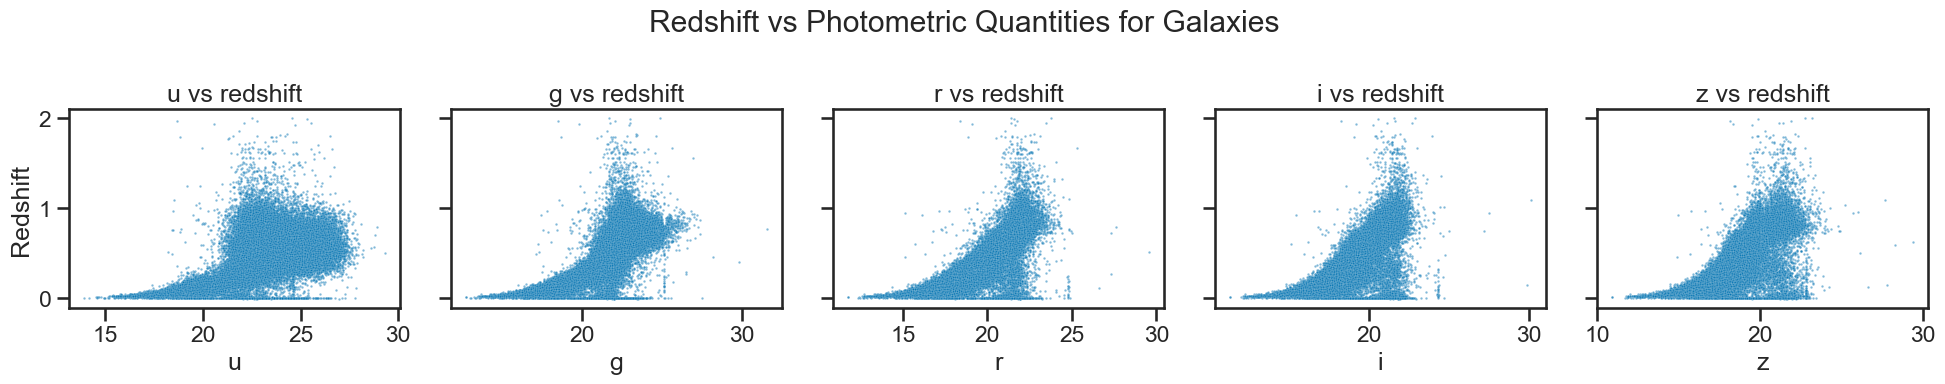

In [17]:
### your code here

# Plotting redshift against photometric quantities for galaxies
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
sns.scatterplot(x='u', y='redshift', data=df_galaxy, ax=axes[0], alpha=0.5, s=3)
axes[0].set_xlabel('u')
axes[0].set_title('u vs redshift')
sns.scatterplot(x='g', y='redshift', data=df_galaxy, ax=axes[1], alpha=0.5, s=3)
axes[1].set_xlabel('g')
axes[1].set_title('g vs redshift')
sns.scatterplot(x='r', y='redshift', data=df_galaxy, ax=axes[2], alpha=0.5, s=3)
axes[2].set_xlabel('r')
axes[2].set_title('r vs redshift')
sns.scatterplot(x='i', y='redshift', data=df_galaxy, ax=axes[3], alpha=0.5, s=3)
axes[3].set_xlabel('i')
axes[3].set_title('i vs redshift')
sns.scatterplot(x='z', y='redshift', data=df_galaxy, ax=axes[4], alpha=0.5, s=3)
axes[4].set_xlabel('z')
axes[4].set_title('z vs redshift')
axes[0].set_ylabel('Redshift')
for ax in axes[1:]:
    ax.set_ylabel('')
plt.suptitle('Redshift vs Photometric Quantities for Galaxies')
plt.tight_layout()
plt.show()

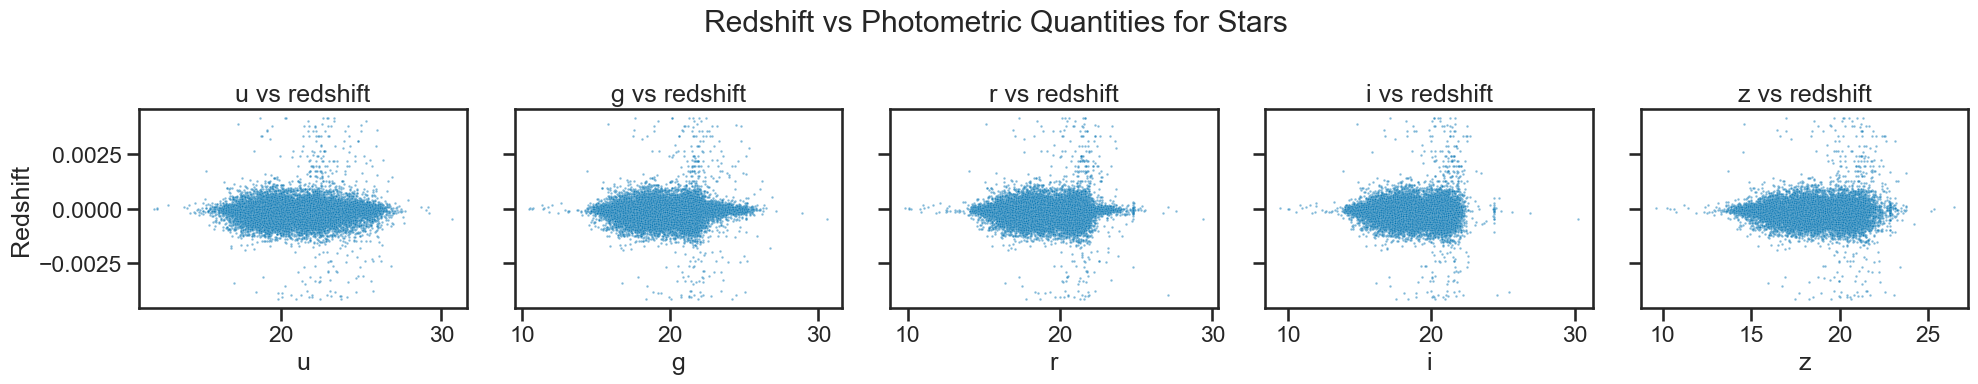

In [18]:
### your code here

# Plotting redshift against photometric quantities for stars
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
sns.scatterplot(x='u', y='redshift', data=df_star, ax=axes[0], alpha=0.5, s=3)
axes[0].set_xlabel('u')
axes[0].set_title('u vs redshift')
sns.scatterplot(x='g', y='redshift', data=df_star, ax=axes[1], alpha=0.5, s=3)
axes[1].set_xlabel('g')
axes[1].set_title('g vs redshift')
sns.scatterplot(x='r', y='redshift', data=df_star, ax=axes[2], alpha=0.5, s=3)
axes[2].set_xlabel('r')
axes[2].set_title('r vs redshift')
sns.scatterplot(x='i', y='redshift', data=df_star, ax=axes[3], alpha=0.5, s=3)
axes[3].set_xlabel('i')
axes[3].set_title('i vs redshift')
sns.scatterplot(x='z', y='redshift', data=df_star, ax=axes[4], alpha=0.5, s=3)
axes[4].set_xlabel('z')
axes[4].set_title('z vs redshift')
axes[0].set_ylabel('Redshift')
for ax in axes[1:]:
    ax.set_ylabel('')
plt.suptitle('Redshift vs Photometric Quantities for Stars')
plt.tight_layout()
plt.show()

---
### Additional resources

* [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
* [Matplotlib documentation](https://matplotlib.org/stable/contents.html)
* [Seaborn documentation](https://seaborn.pydata.org/)

#### Websites with examples of data analysis with `pandas`, `matplotlib`, and `seaborn`:

* [Pandas Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html)
* [Matplotlib Gallery](https://matplotlib.org/stable/gallery/index.html)
* [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)
